# Section 3

Data visualization(s) based on suitable visualization techniques.

## Input Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Plotting style
sns.set_style('darkgrid')
sns.set_theme(font_scale=1.)

In [3]:
name_data_file="heart_failure_clinical_records_dataset"

data = pd.read_csv(f"../raw_data/{name_data_file}.csv", na_values=["?"])

In [4]:
# Select features (all columns except target)
X = data.drop(columns=["DEATH_EVENT"])  # all features except the target

# Select target
y = data["DEATH_EVENT"]

# Check data shape
assert X.shape == (299,12), "There should be 299 samples and 12 features"
assert y.shape == (299,), "There should be 299 samples in the target variable"

In [16]:
X.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000


In [6]:
y.describe()

count    299.00000
mean       0.32107
std        0.46767
min        0.00000
25%        0.00000
50%        0.00000
75%        1.00000
max        1.00000
Name: DEATH_EVENT, dtype: float64

## No centering, no standartization

The code below is not very good. 

The graph shows the PCs if we don't perform standardization on the data before applying PCA. 

Our features have very different ranges, and what happens is that the variables with higher variance will dominate PC1 and the others will become irrelevant. 

Therefore, this graph is not very relevant, except to show the importance of performing standardization.

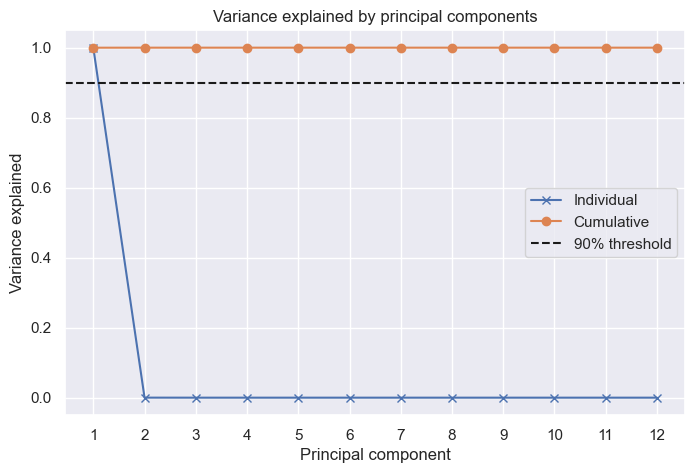

In [ ]:
# Create and fit PCA
working_X = X.copy()

pca = PCA()
pca.fit(working_X)

# Extract principal components (V)
V = pca.components_.T

# Fraction of variance explained by each PC
rho = pca.explained_variance_ratio_

# Threshold for cumulative variance
threshold = 0.9

# Plot variance explained
plt.figure(figsize=(8,5))
plt.plot(range(1, len(rho) + 1), rho, "x-", label="Individual")
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-", label="Cumulative")
plt.axhline(y=threshold, color="k", linestyle="--", label="90% threshold")
plt.title("Variance explained by principal components")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.xticks(range(1, len(rho) + 1))
plt.legend()
plt.grid(True)
plt.show()

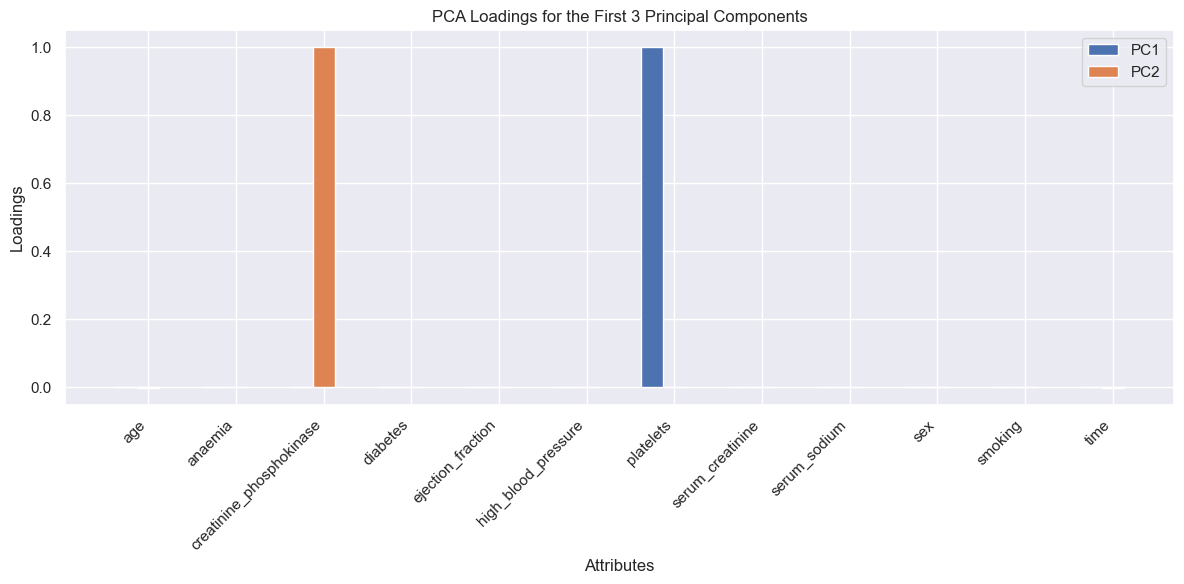

Principal Component 1 explains 99.99% of the variance.
Principal Component 2 explains 0.01% of the variance.


In [11]:
#  PCA w/ 2 components
pca = PCA(n_components=2)
pca.fit(working_X)

# principal components
loadings = pca.components_.T
attributes = working_X.columns

# plot of the weights of each variable for the 2 Principal components
plt.figure(figsize=(12, 6))
for i in range(loadings.shape[1]):
    plt.bar(np.arange(len(attributes)) + i*0.25, loadings[:, i], width=0.25, label=f'PC{i+1}')

plt.xticks(np.arange(len(attributes)) + 0.25, attributes, rotation=45, ha='right')
plt.xlabel('Attributes')
plt.ylabel('Loadings')
plt.title('PCA Loadings for the First 3 Principal Components')
plt.legend()
plt.tight_layout()
plt.show()

# variance explained by each principal component
explained_variance = pca.explained_variance_ratio_
for i, var in enumerate(explained_variance, start=1):
    print(f"Principal Component {i} explains {var:.2%} of the variance.")

Checks!

So most of the variance is explained by the variables with the highest variance, makes sense

In [23]:
X.describe()[["serum_creatinine", "platelets"]]

,serum_creatinine,platelets
count,299.00000,299.000000
mean,1.39388,263358.029264
std,1.03451,97804.236869
min,0.50000,25100.000000
25%,0.90000,212500.000000
50%,1.10000,262000.000000
75%,1.40000,303500.000000
max,9.40000,850000.000000


## Yes Centering in all variables, Yes standartization in all variables

In [69]:

#Columns that have continous variables

# Standardization
scaler = StandardScaler()
# Fit and transform, then convert back to DataFrame
X_scaled = pd.DataFrame(
    scaler.fit_transform(X),  # NumPy array
    columns=X.columns,        # keep original column names
    index=X.index             # keep original row index
)

X_scaled.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,2.990000e+02,2.990000e+02,299.000000,2.990000e+02,2.990000e+02,299.000000,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02
mean,5.703353e-16,1.009969e-16,0.000000,9.060014e-17,-3.267546e-17,0.000000,7.723291e-17,1.425838e-16,-8.673849e-16,-8.911489e-18,-1.188199e-17,-1.901118e-16
std,1.001676e+00,1.001676e+00,1.001676,1.001676e+00,1.001676e+00,1.001676,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00
min,-1.754448e+00,-8.711048e-01,-0.576918,-8.475794e-01,-2.038387e+00,-0.735688,-2.440155e+00,-8.655094e-01,-5.363206e+00,-1.359272e+00,-6.876819e-01,-1.629502e+00
25%,-8.281242e-01,-8.711048e-01,-0.480393,-8.475794e-01,-6.841802e-01,-0.735688,-5.208700e-01,-4.782047e-01,-5.959961e-01,-1.359272e+00,-6.876819e-01,-7.389995e-01
50%,-7.022315e-02,-8.711048e-01,-0.342574,-8.475794e-01,-7.076750e-03,-0.735688,-1.390846e-02,-2.845524e-01,8.503384e-02,7.356882e-01,-6.876819e-01,-1.969543e-01
75%,7.718891e-01,1.147968e+00,0.000166,1.179830e+00,5.853888e-01,1.359272,4.111199e-01,5.926150e-03,7.660638e-01,7.356882e-01,1.454161e+00,9.387595e-01
max,2.877170e+00,1.147968e+00,7.514640,1.179830e+00,3.547716e+00,1.359272,6.008180e+00,7.752020e+00,2.582144e+00,7.356882e-01,1.454161e+00,1.997038e+00


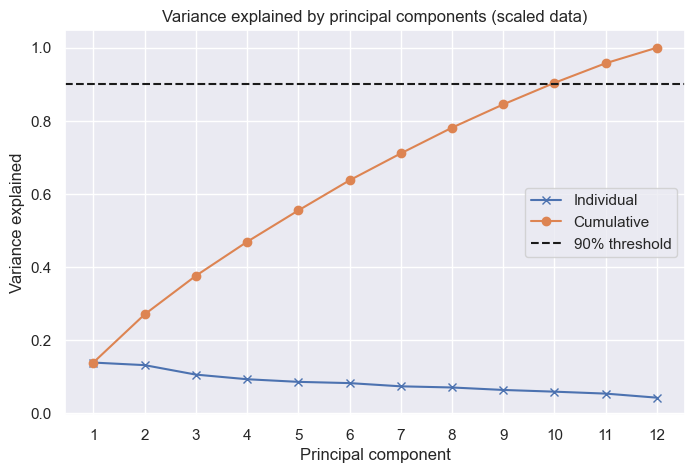

In [70]:
# PCA applied to standardized data
pca = PCA()
pca.fit(X_scaled)

# Compute fraction of variance explained
rho = pca.explained_variance_ratio_

# Plot
threshold = 0.9
plt.figure(figsize=(8,5))
plt.plot(range(1, len(rho)+1), rho, "x-", label="Individual")
plt.plot(range(1, len(rho)+1), np.cumsum(rho), "o-", label="Cumulative")
plt.axhline(y=threshold, color="k", linestyle="--", label="90% threshold")
plt.title("Variance explained by principal components (scaled data)")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.xticks(range(1, len(rho)+1))
plt.legend()
plt.grid(True)
plt.show()


### Plot of PC1 x PC2, 

which is not supossed to reveal any fantastic conclusions since variance is distributed across all variables

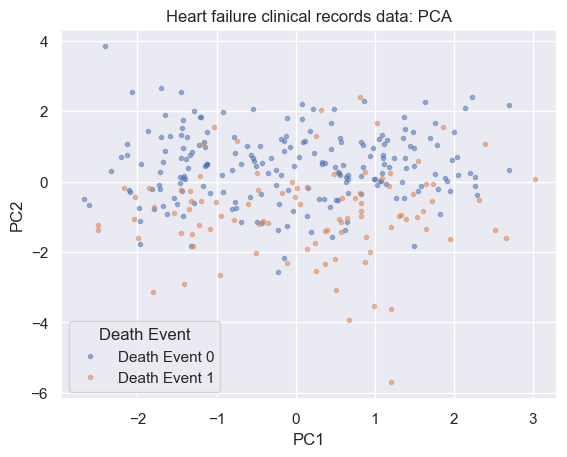

In [71]:
PC_idxs = [0, 1]  
unique_classes = np.unique(y) 

# Project X to the subspace
B = pca.transform(X_scaled)

# Plot PCA of the data
fig = plt.figure()
plt.title("Heart failure clinical records data: PCA")

# Plot the data projected onto the principal components, colored by fluid type
for fluid_type in unique_classes:
    # Construct a mask for the current fluid type
    mask = (y == fluid_type)
    plt.plot(
        B[mask, PC_idxs[0]], 
        B[mask, PC_idxs[1]], 
        ".", 
        alpha=0.5, 
        label=f"Death Event {fluid_type}" 
    )

# Set axis labels
plt.xlabel(f"PC{PC_idxs[0] + 1}")
plt.ylabel(f"PC{PC_idxs[1] + 1}")

# Add side legend
plt.legend(title="Death Event")
plt.show()

### Histogram of components

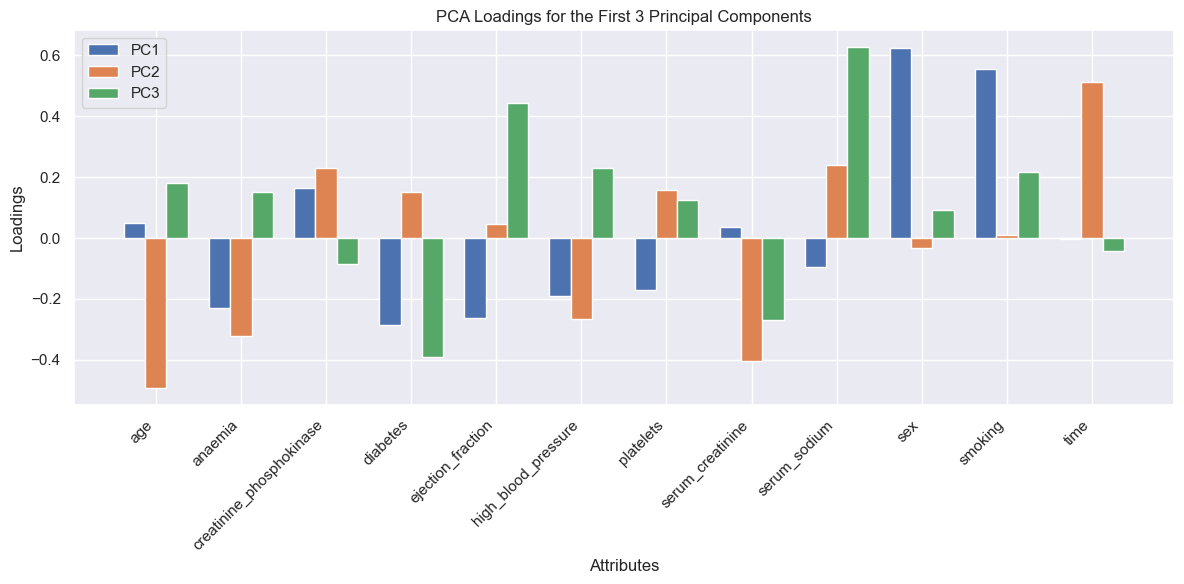

Principal Component 1 explains 13.86% of the variance.
Principal Component 2 explains 13.16% of the variance.
Principal Component 3 explains 10.57% of the variance.
[[ 0.04910096 -0.49093212  0.18210792]
 [-0.22818273 -0.3204641   0.15043645]
 [ 0.16276474  0.23092179 -0.08398492]
 [-0.2846968   0.1515776  -0.38923962]
 [-0.26181158  0.04666221  0.44331474]
 [-0.19025566 -0.26518934  0.22977573]
 [-0.17021348  0.1570159   0.12455731]
 [ 0.0371995  -0.4036002  -0.26900254]
 [-0.0935383   0.24087094  0.62552819]
 [ 0.62237639 -0.03396914  0.092957  ]
 [ 0.55387042  0.00854975  0.21630183]
 [-0.00198151  0.51058016 -0.04159205]]


In [72]:
# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  PCA w/ 3 components
pca = PCA(n_components=3)
pca.fit(X_scaled)

# principal components
loadings = pca.components_.T
attributes = X.columns

# plot of the weights of each variable for the 3 Principal components
plt.figure(figsize=(12, 6))
for i in range(loadings.shape[1]):
    plt.bar(np.arange(len(attributes)) + i*0.25, loadings[:, i], width=0.25, label=f'PC{i+1}')

plt.xticks(np.arange(len(attributes)) + 0.25, attributes, rotation=45, ha='right')
plt.xlabel('Attributes')
plt.ylabel('Loadings')
plt.title('PCA Loadings for the First 3 Principal Components')
plt.legend()
plt.tight_layout()
plt.show()

# variance explained by each principal component
explained_variance = pca.explained_variance_ratio_
for i, var in enumerate(explained_variance, start=1):
    print(f"Principal Component {i} explains {var:.2%} of the variance.")

print(loadings)

### Plots

1 PC1 x PC2

2 Accumulated explained variance

3 PC1 x PC2 vector componets ploted

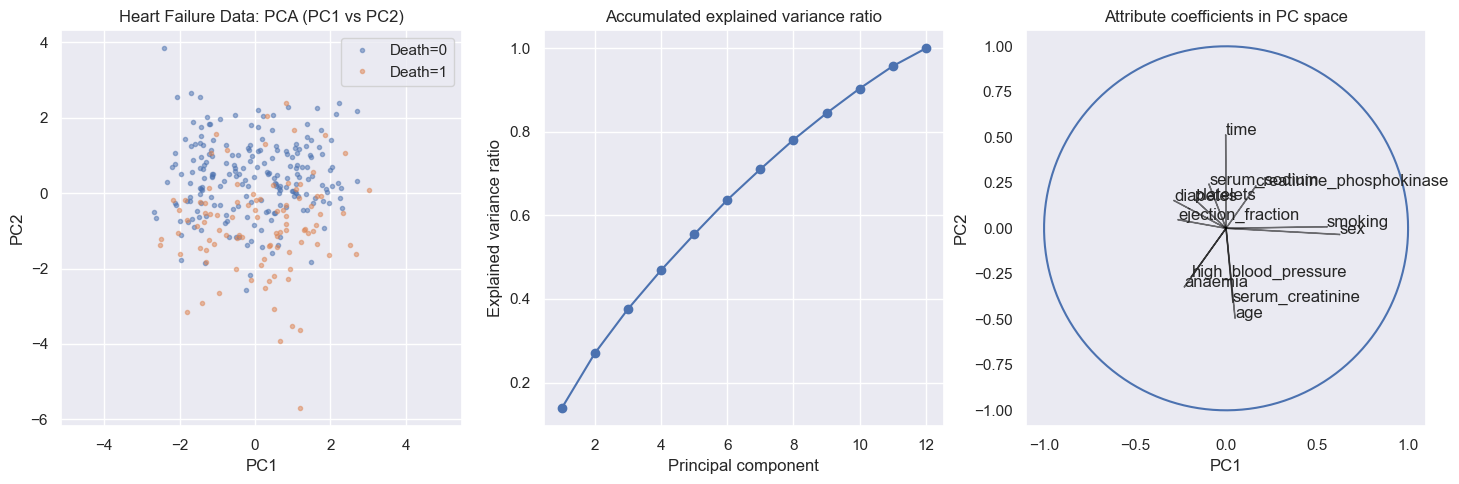

In [73]:
# PCA
X_scaled_working=pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

pca = PCA()
B = pca.fit_transform(X_scaled_working)
V = pca.components_.T

PC_idxs = [0, 1]  # First two principal components

# Make the plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# --- Plot 1: data projected onto PC1/PC2 ---
axs[0].set_title("Heart Failure Data: PCA (PC1 vs PC2)")
for label in np.unique(y):
    mask = (y == label)
    axs[0].plot(B[mask, PC_idxs[0]], B[mask, PC_idxs[1]], ".", alpha=0.5, label=f"Death={label}")

axs[0].set_xlabel(f"PC{PC_idxs[0] + 1}")
axs[0].set_ylabel(f"PC{PC_idxs[1] + 1}")
axs[0].axis("equal")
axs[0].legend()

# --- Plot 2: accumulated explained variance ratio ---
axs[1].set_title("Accumulated explained variance ratio")
axs[1].plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_.cumsum(), marker="o")
axs[1].set_xlabel("Principal component")
axs[1].set_ylabel("Explained variance ratio")

# --- Plot 3: attribute coefficients in principal component space ---
axs[2].set_title("Attribute coefficients in PC space")
for attr_idx, attr_name in enumerate(X_scaled_working.columns):
    axs[2].arrow(0, 0, V[attr_idx, PC_idxs[0]], V[attr_idx, PC_idxs[1]], color='black', alpha=0.5)
    axs[2].text(V[attr_idx, PC_idxs[0]], V[attr_idx, PC_idxs[1]], attr_name)

axs[2].set_xlim([-1, 1])
axs[2].set_ylim([-1, 1])
axs[2].set_xlabel(f"PC{PC_idxs[0] + 1}")
axs[2].set_ylabel(f"PC{PC_idxs[1] + 1}")
axs[2].grid()
# Add a unit circle
axs[2].plot(np.cos(np.arange(0, 2 * np.pi, 0.01)), np.sin(np.arange(0, 2 * np.pi, 0.01)))
axs[2].axis("equal")

plt.tight_layout()
plt.show()



## Yes Centering in cont variables, Yes standartization in cont variables


In [54]:
cont_variables = ["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"]
scaler = StandardScaler()


X_scaled = X.copy()
X_scaled[cont_variables] = scaler.fit_transform(X[cont_variables])

X_scaled.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,2.990000e+02,299.000000,299.000000,299.000000,2.990000e+02,299.000000,2.990000e+02,2.990000e+02,2.990000e+02,299.000000,299.00000,2.990000e+02
mean,5.703353e-16,0.431438,0.000000,0.418060,-3.267546e-17,0.351171,7.723291e-17,1.425838e-16,-8.673849e-16,0.648829,0.32107,-1.901118e-16
std,1.001676e+00,0.496107,1.001676,0.494067,1.001676e+00,0.478136,1.001676e+00,1.001676e+00,1.001676e+00,0.478136,0.46767,1.001676e+00
min,-1.754448e+00,0.000000,-0.576918,0.000000,-2.038387e+00,0.000000,-2.440155e+00,-8.655094e-01,-5.363206e+00,0.000000,0.00000,-1.629502e+00
25%,-8.281242e-01,0.000000,-0.480393,0.000000,-6.841802e-01,0.000000,-5.208700e-01,-4.782047e-01,-5.959961e-01,0.000000,0.00000,-7.389995e-01
50%,-7.022315e-02,0.000000,-0.342574,0.000000,-7.076750e-03,0.000000,-1.390846e-02,-2.845524e-01,8.503384e-02,1.000000,0.00000,-1.969543e-01
75%,7.718891e-01,1.000000,0.000166,1.000000,5.853888e-01,1.000000,4.111199e-01,5.926150e-03,7.660638e-01,1.000000,1.00000,9.387595e-01
max,2.877170e+00,1.000000,7.514640,1.000000,3.547716e+00,1.000000,6.008180e+00,7.752020e+00,2.582144e+00,1.000000,1.00000,1.997038e+00


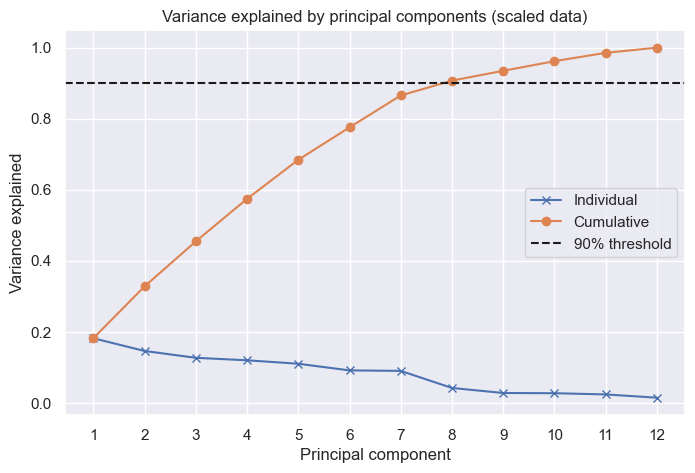

In [55]:
# PCA applied to standardized data
pca = PCA()
pca.fit(X_scaled)

# Compute fraction of variance explained
rho = pca.explained_variance_ratio_

# Plot
threshold = 0.9
plt.figure(figsize=(8,5))
plt.plot(range(1, len(rho)+1), rho, "x-", label="Individual")
plt.plot(range(1, len(rho)+1), np.cumsum(rho), "o-", label="Cumulative")
plt.axhline(y=threshold, color="k", linestyle="--", label="90% threshold")
plt.title("Variance explained by principal components (scaled data)")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.xticks(range(1, len(rho)+1))
plt.legend()
plt.grid(True)
plt.show()


### Plot of PC1 x PC2, 

which is not supossed to reveal any fantastic conclusions since variance is distributed across all variables

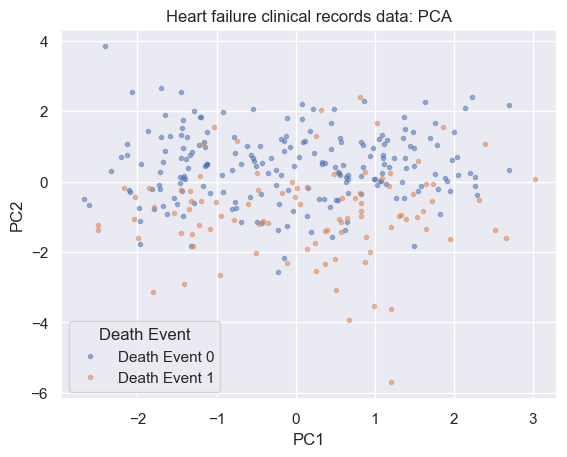

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

PC_idxs = [0, 1]  
unique_classes = np.unique(y) 

# Project X to the subspace
B = pca.transform(X_scaled)

# Plot PCA of the data
fig = plt.figure()
plt.title("Heart failure clinical records data: PCA")

# Plot the data projected onto the principal components, colored by fluid type
for fluid_type in unique_classes:
    # Construct a mask for the current fluid type
    mask = (y == fluid_type)
    plt.plot(
        B[mask, PC_idxs[0]], 
        B[mask, PC_idxs[1]], 
        ".", 
        alpha=0.5, 
        label=f"Death Event {fluid_type}" 
    )

# Set axis labels
plt.xlabel(f"PC{PC_idxs[0] + 1}")
plt.ylabel(f"PC{PC_idxs[1] + 1}")

# Add side legend
plt.legend(title="Death Event")
plt.show()


### Histogram of components

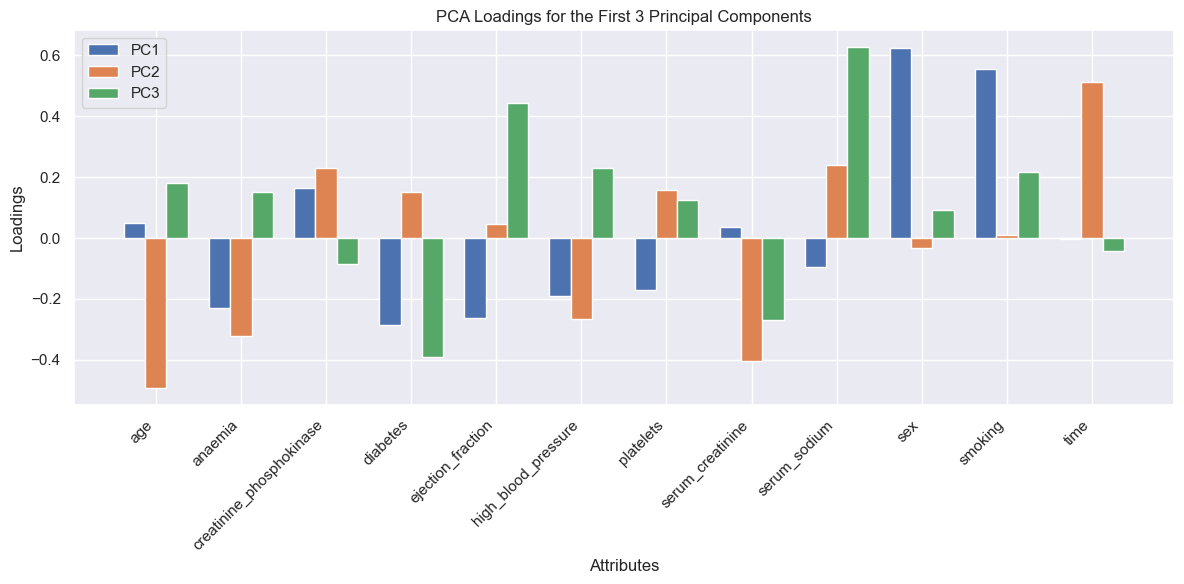

Principal Component 1 explains 13.86% of the variance.
Principal Component 2 explains 13.16% of the variance.
Principal Component 3 explains 10.57% of the variance.
[[ 0.04910096 -0.49093212  0.18210792]
 [-0.22818273 -0.3204641   0.15043645]
 [ 0.16276474  0.23092179 -0.08398492]
 [-0.2846968   0.1515776  -0.38923962]
 [-0.26181158  0.04666221  0.44331474]
 [-0.19025566 -0.26518934  0.22977573]
 [-0.17021348  0.1570159   0.12455731]
 [ 0.0371995  -0.4036002  -0.26900254]
 [-0.0935383   0.24087094  0.62552819]
 [ 0.62237639 -0.03396914  0.092957  ]
 [ 0.55387042  0.00854975  0.21630183]
 [-0.00198151  0.51058016 -0.04159205]]


In [ ]:
# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  PCA w/ 3 components
pca = PCA(n_components=3)
pca.fit(X_scaled)

# principal components
loadings = pca.components_.T
attributes = X.columns

# plot of the weights of each variable for the 3 Principal components
plt.figure(figsize=(12, 6))
for i in range(loadings.shape[1]):
    plt.bar(np.arange(len(attributes)) + i*0.25, loadings[:, i], width=0.25, label=f'PC{i+1}')

plt.xticks(np.arange(len(attributes)) + 0.25, attributes, rotation=45, ha='right')
plt.xlabel('Attributes')
plt.ylabel('Loadings')
plt.title('PCA Loadings for the First 3 Principal Components')
plt.legend()
plt.tight_layout()
plt.show()

# variance explained by each principal component
explained_variance = pca.explained_variance_ratio_
for i, var in enumerate(explained_variance, start=1):
    print(f"Principal Component {i} explains {var:.2%} of the variance.")

print(loadings)

### Plots

1 PC1 x PC2

2 Accumulated explained variance

3 PC1 x PC2 vector componets ploted

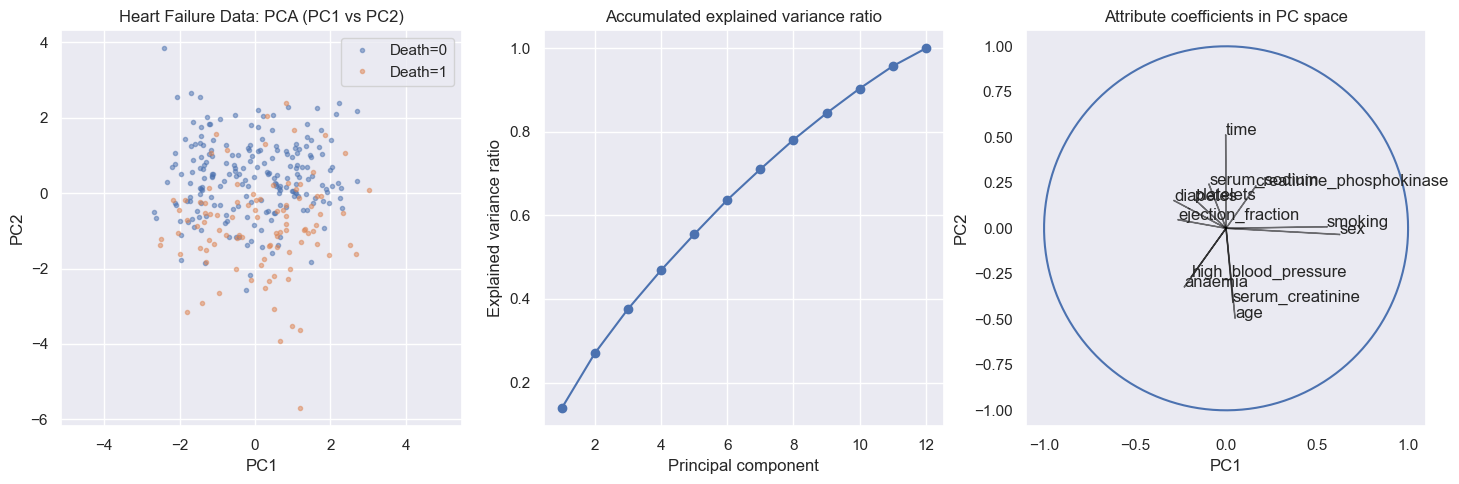

In [51]:
# PCA
X_scaled_working=pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

pca = PCA()
B = pca.fit_transform(X_scaled_working)
V = pca.components_.T

PC_idxs = [0, 1]  # First two principal components

# Make the plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# --- Plot 1: data projected onto PC1/PC2 ---
axs[0].set_title("Heart Failure Data: PCA (PC1 vs PC2)")
for label in np.unique(y):
    mask = (y == label)
    axs[0].plot(B[mask, PC_idxs[0]], B[mask, PC_idxs[1]], ".", alpha=0.5, label=f"Death={label}")

axs[0].set_xlabel(f"PC{PC_idxs[0] + 1}")
axs[0].set_ylabel(f"PC{PC_idxs[1] + 1}")
axs[0].axis("equal")
axs[0].legend()

# --- Plot 2: accumulated explained variance ratio ---
axs[1].set_title("Accumulated explained variance ratio")
axs[1].plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_.cumsum(), marker="o")
axs[1].set_xlabel("Principal component")
axs[1].set_ylabel("Explained variance ratio")

# --- Plot 3: attribute coefficients in principal component space ---
axs[2].set_title("Attribute coefficients in PC space")
for attr_idx, attr_name in enumerate(X_scaled_working.columns):
    axs[2].arrow(0, 0, V[attr_idx, PC_idxs[0]], V[attr_idx, PC_idxs[1]], color='black', alpha=0.5)
    axs[2].text(V[attr_idx, PC_idxs[0]], V[attr_idx, PC_idxs[1]], attr_name)

axs[2].set_xlim([-1, 1])
axs[2].set_ylim([-1, 1])
axs[2].set_xlabel(f"PC{PC_idxs[0] + 1}")
axs[2].set_ylabel(f"PC{PC_idxs[1] + 1}")
axs[2].grid()
# Add a unit circle
axs[2].plot(np.cos(np.arange(0, 2 * np.pi, 0.01)), np.sin(np.arange(0, 2 * np.pi, 0.01)))
axs[2].axis("equal")

plt.tight_layout()
plt.show()



# Trash Bin

In [ ]:
bw = 0.05
n_features = X_scaled.shape[1]
chunk_size = 6  # number of attributes per subplot
n_chunks = int(np.ceil(n_features / chunk_size))  # number of subplots

# Loop over chunks and create a subplot for each
fig, axs = plt.subplots(n_chunks, 1, figsize=(10, 4 * n_chunks))

for chunk_idx in range(n_chunks):
    start = chunk_idx * chunk_size
    end = min(start + chunk_size, n_features)
    r = np.arange(start + 1, end + 1)  # x positions for bars
    
    ax = axs[chunk_idx] if n_chunks > 1 else axs  # handle single subplot case
    for i, pc in enumerate(V[:, :3].T):  # first 3 PCs can change the number 3 to a bigger one in order to see more PCs (if you put many more change the value on bw to 0.1)
        ax.bar(r + i * bw, pc[start:end], width=bw, label=f"PC{i+1}")
    
    ax.set_xticks(r + bw)
    ax.set_xticklabels(X_scaled.columns[start:end], rotation=45)
    ax.set_xlabel("Attributes")
    ax.set_ylabel("Component coefficients")
    ax.set_title(f"PCA Coefficients (Attributes {start+1} to {end})")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Index of the attribute "platelets"
attr_idx = list(X.columns).index("platelets") #aqui podem mudar para "time" e percebe se que também não fica igual ao caso de cime

plt.figure(figsize=(6, 6))
plt.title("Platelets representation in PCA space")

# Plot only the vector for "platelets"
plt.arrow(0, 0, V[attr_idx, 0], V[attr_idx, 1], 
          color='red', alpha=0.8, head_width=0.03)
plt.text(V[attr_idx, 0], V[attr_idx, 1], "platelets", color='red')

# Formatting
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.grid()
plt.gca().set_aspect("equal", adjustable="box")

# Add a reference circle
theta = np.linspace(0, 2*np.pi, 200)
plt.plot(np.cos(theta), np.sin(theta), linestyle="--", color="gray")

plt.show()